# Keras Baseline Model
### Bryant Crocker

Recently I have been playing around a bit with the keras python package and trying to learn more about neural networks.  I was briefly introduced to neural networks in my STAT 295 Introductory To Statistical Learning course.  

>Neural networks have 3 main components:
>
>* Input Layer - The input layer brings the initial data into the system, one input node is typically made per predictor
>
>* Hidden Layer - weights that are used to transform input layer
>
>* Output Layer - The last layed that processes the system into scalar predictions

### Example Neural Network Structure

![alt text](https://www.researchgate.net/profile/Azman_Azid3/publication/283149028/figure/fig2/AS:288382870671361@1445767242473/Network-structure-of-a-multilayer-feed-forward-artificial-neural-network-ML-FF-ANN.png "Neural Network Structure")

In [4]:
#import necessary libraries
import seaborn as sns 
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
%matplotlib inline 
df = sns.load_dataset('iris')

# The dataset

Iris Setosa

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)


CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=170298

I'll start off with a few exploratory plots and summaries to show some features of the iris data incase you are not familar.

In [2]:
# look at the first few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Peaking at a few histograms it is easy to see that there is a clear seperation between the two classes with respect to petal length. Setosa has the shortest petal length on average.

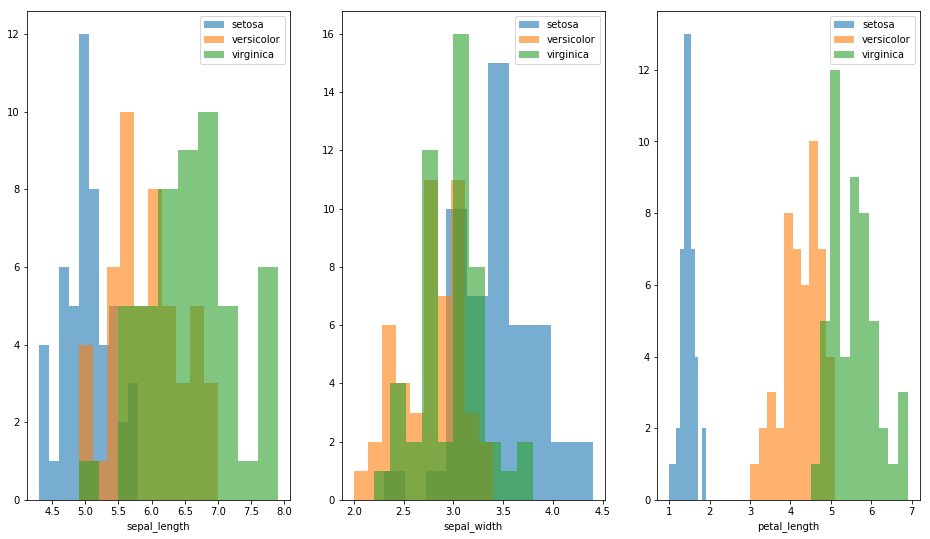

In [5]:
# loop over and plot relevant columns
cols = df.columns[0:3]
x = 0
fig, ax = plt.subplots(1, 3, figsize =(16,9))
for i in cols:
    ax = ax.ravel()
    ax[x].hist(df[df.species == "setosa"][i], label = 'setosa', alpha = 0.6)
    ax[x].hist(df[df.species == 'versicolor'][i], label = 'versicolor', alpha = 0.6)
    ax[x].hist(df[df.species == 'virginica'][i], label = 'virginica', alpha = 0.6)
    ax[x].legend(loc = 'best')
    ax[x].set_xlabel(i)
    x += 1
plt.show()

Luckily, the counts of the 3 species are equal, class imbalance can make it hard to for classifiers to recall minority classes.

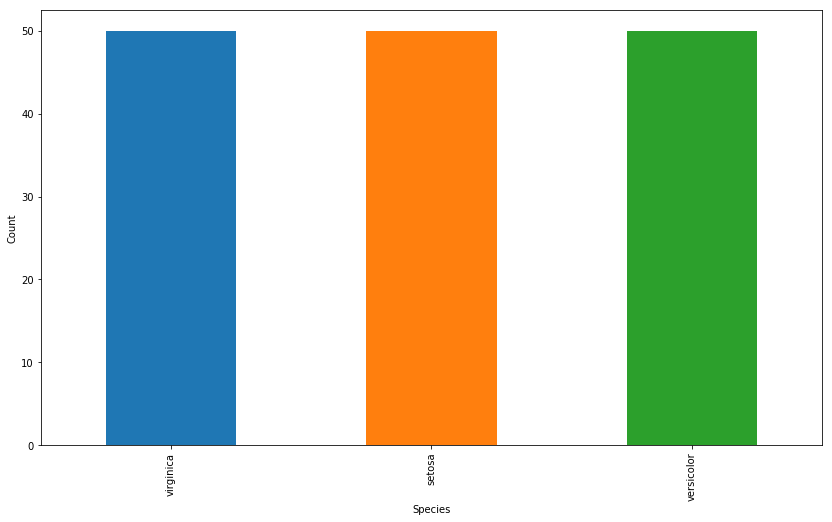

In [105]:
df['species'].value_counts().plot(kind = "bar", figsize =(14,8))
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

I next perform a few preprocessing steps for the classification:
I encode each label as an integer and then one hot encode them.  

In [108]:
X = df.drop('species', 1).values
y = df['species'].values
# encode values as ints
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert ints to one hot encoded dummy vars
dummy_y = np_utils.to_categorical(encoded_Y)

I next define the keras model and evaluate it

In [121]:
def baseline_model():
    '''This fucntion defines and compiles a basic keras model on the Iris dataset'''
    # create model
    model = Sequential()
    #create hidden layer
    model.add(Dense(8, input_dim=4, activation='relu'))
    #create output layer
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline average cross valadation accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
x = 1
for i in results:
    print("fold", x , "accuracy", i )
    x += 1

Baseline average cross valadation accuracy: 98.00% (4.27%)
fold 1 accuracy 1.0
fold 2 accuracy 1.0
fold 3 accuracy 1.0
fold 4 accuracy 1.0
fold 5 accuracy 1.0
fold 6 accuracy 0.9333333373069763
fold 7 accuracy 1.0
fold 8 accuracy 1.0
fold 9 accuracy 1.0
fold 10 accuracy 0.8666666746139526
